In [1]:
# importing all the necessary libraries

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('Company Stock and Investment.csv')

In [3]:
df.head(5)

,Date,Oil Investments,Gold Investments,Comp Stock,Other sharesInvestments
0,31-12-2009,0.025417,0.000150,0.017354,0.006848
1,04-01-2010,0.026830,0.001097,0.015565,-0.004609
2,05-01-2010,0.002699,0.001560,0.001729,0.005900
3,06-01-2010,0.021688,0.006009,-0.015906,-0.018116
4,07-01-2010,-0.006256,0.000221,-0.001849,-0.017013


In [4]:
df.drop(['Gold Investments','Comp Stock','Other sharesInvestments'],axis=1,inplace=True)

In [5]:
df.head(2)

,Date,Oil Investments
0,31-12-2009,0.025417
1,04-01-2010,0.026830


In [6]:
# Checking any null value
df.isnull().sum()

Date               0
Oil Investments    0
dtype: int64

In [7]:
# Convert Date into Datetime
df['Date']=pd.to_datetime(df['Date'])

In [8]:
# Setting Date as index
df1=df.set_index('Date')

In [11]:
df1.head(2)

,Oil Investments
Date,
2009-12-31,0.025417
2010-04-01,0.026830


In [14]:
df1.describe()

,Oil Investments
count,1984.000000
mean,-0.000435
std,0.030869
min,-1.000000
25%,-0.011021
50%,0.000277
75%,0.010734
max,0.119511


# Visualizing data

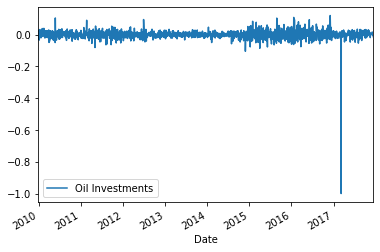

In [15]:
df1.plot()

Since the above graph is not clear, therefor we will take small small segments and then plot it to check the data type

In [23]:
till_date='2012-12-31'
df_seg_1=df.loc[df['Date']<=(till_date)]
df_seg_1['Date']=pd.to_datetime(df_seg_1['Date'])

C:\Users\RIA MAITRA\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [24]:
df_seg_1.set_index('Date',inplace=True)

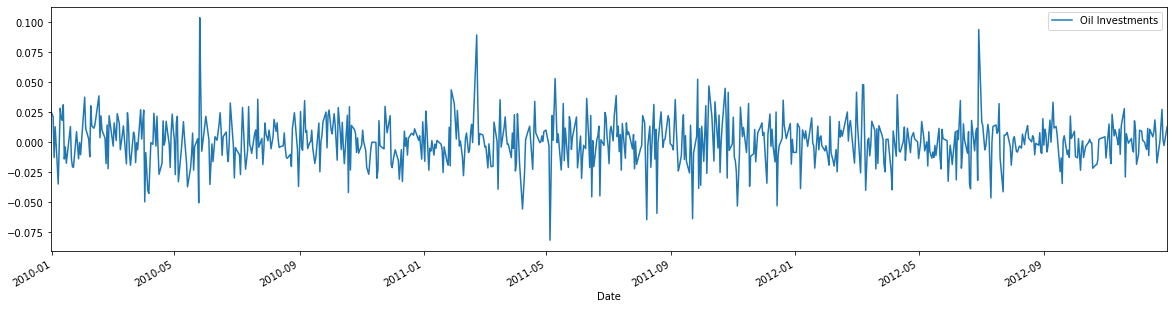

In [25]:
df_seg_1.plot(figsize=(20,5))

C:\Users\RIA MAITRA\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


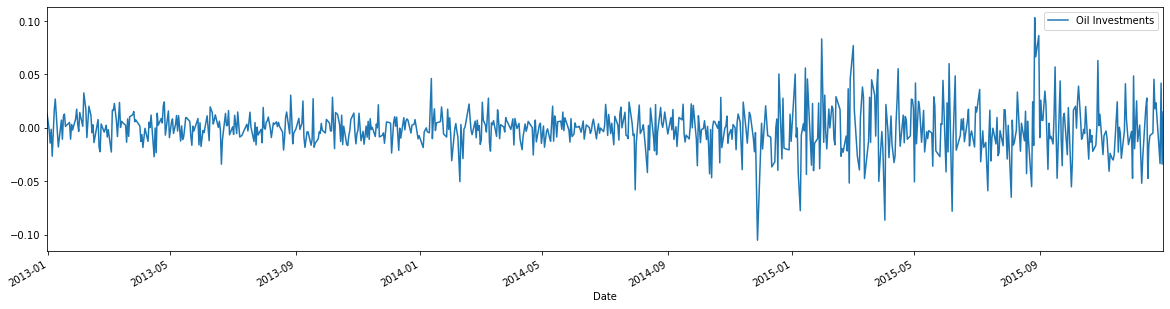

In [29]:
start_date='2012-12-31'
till_date='2015-12-31'
after_start_date=df["Date"]>=start_date
before_end_date=df["Date"]<=till_date
between_two_dates=after_start_date & before_end_date
df_seg_2=df.loc[between_two_dates]
df_seg_2['Date']=pd.to_datetime(df_seg_2['Date'])
df_seg_2.set_index('Date',inplace=True)
df_seg_2.plot(figsize=(20,5))

C:\Users\RIA MAITRA\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


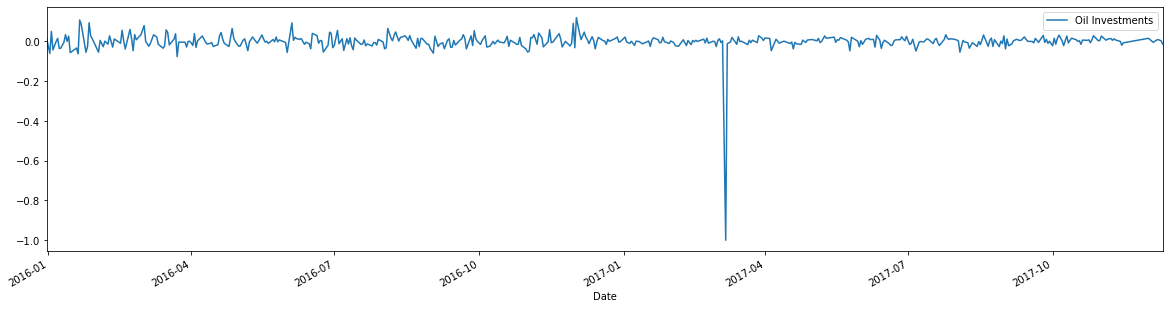

In [30]:
start_date='2015-12-31'
till_date='2017-12-31'
after_start_date=df["Date"]>=start_date
before_end_date=df["Date"]<=till_date
between_two_dates=after_start_date & before_end_date
df_seg_3=df.loc[between_two_dates]
df_seg_3['Date']=pd.to_datetime(df_seg_3['Date'])
df_seg_3.set_index('Date',inplace=True)
df_seg_3.plot(figsize=(20,5))

From the above graphs we can say itsa seasonal data as every year oil investment is going up.
only in 2017 around month march the oil investment has gone way too down.

Now we will check if data is stationary or not.

In [31]:
### Testing For Stationarity

from statsmodels.tsa.stattools import adfuller

In [33]:
test_result=adfuller(df['Oil Investments']) # adfuller give us 5 values

In [34]:
  # just showing the ouput of test_result
print(" The Values given as output by adfuller is : \n 'ADF Test Statistic','p-value','#Lags Used','Number of Observations Used'\n\n",test_result)

 The Values given as output by adfuller is : 
 'ADF Test Statistic','p-value','#Lags Used','Number of Observations Used'

 (-45.94216292983992, 0.0, 0, 1983, {'1%': -3.4336519592295947, '5%': -2.862998620943585, '10%': -2.567546508593341}, -8042.187722182893)


In [36]:
#Ho: It is non stationary
#H1: It is stationary

def adfuller_test(Oil_investment):
    result=adfuller(Oil_investment) # same as above ,variable name changed
    labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations Used']
    for value,label in zip(result,labels):
        print(label+' : '+str(value) )
    if result[1] <= 0.05:
        print("strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data  is stationary")
    else:
        print("weak evidence against null hypothesis, time series is non-stationary ")

In [40]:
df.columns

Index(['Date', 'Oil Investments'], dtype='object')

In [41]:
adfuller_test(df['Oil Investments'])

ADF Test Statistic : -45.94216292983992
p-value : 0.0
#Lags Used : 0
Number of Observations Used : 1983
strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data  is stationary


Our data is stationary as p value is less than 0.05

# Auto Regressive Model

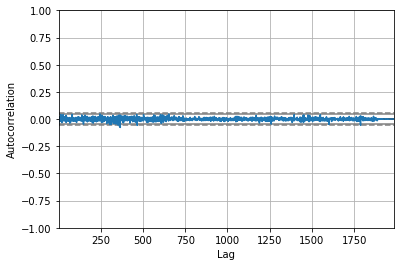

In [43]:
from pandas.plotting import autocorrelation_plot
autocorrelation_plot(df['Oil Investments'])
plt.show()

In [46]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
import statsmodels.api as sm

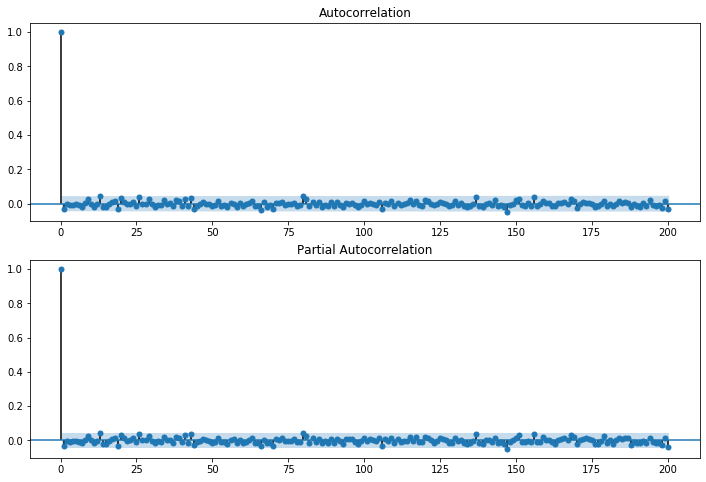

In [47]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(df['Oil Investments'],lags=200,ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(df['Oil Investments'],lags=200,ax=ax2)

# SARIMAX - seasonal arimax

In [48]:
import statsmodels.api as sm 

In [49]:
model=sm.tsa.statespace.SARIMAX(df['Oil Investments'],order=(1, 1, 1),seasonal_order=(1,1,1,12)) #(p,d,q,Shift)
results=model.fit()

C:\Users\RIA MAITRA\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


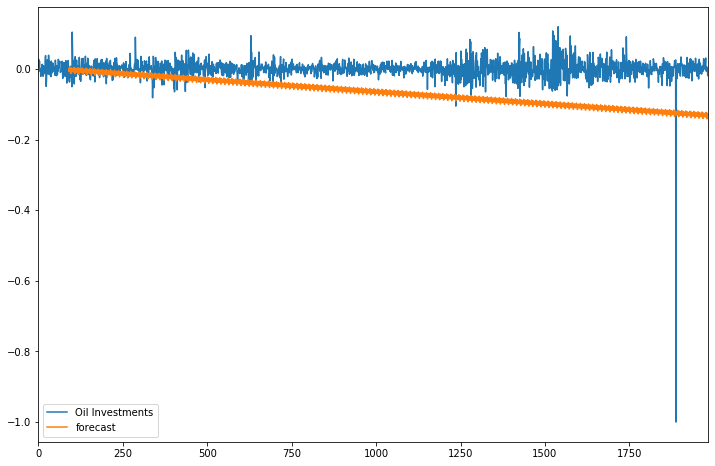

In [53]:
df['forecast']=results.predict(start=90,end=2000,dynamic=True)
df[['Oil Investments','forecast']].plot(figsize=(12,8))

Blue is actual line and orange is predicted line

In [71]:
#creating some data to predict future of this.
from pandas.tseries.offsets import DateOffset
future_dates=[df1.index[-1]+ DateOffset(months=x)for x in range(0,46)]

In [72]:
future_datest_df=pd.DataFrame(index=future_dates[1:],columns=df.columns)

In [73]:
future_datest_df.tail()

,Date,Oil Investments,forecast
2021-04-15,NaN,NaN,NaN
2021-05-15,NaN,NaN,NaN
2021-06-15,NaN,NaN,NaN
2021-07-15,NaN,NaN,NaN
2021-08-15,NaN,NaN,NaN


In [74]:
future_df=pd.concat([df1,future_datest_df])

C:\Users\RIA MAITRA\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """Entry point for launching an IPython kernel.


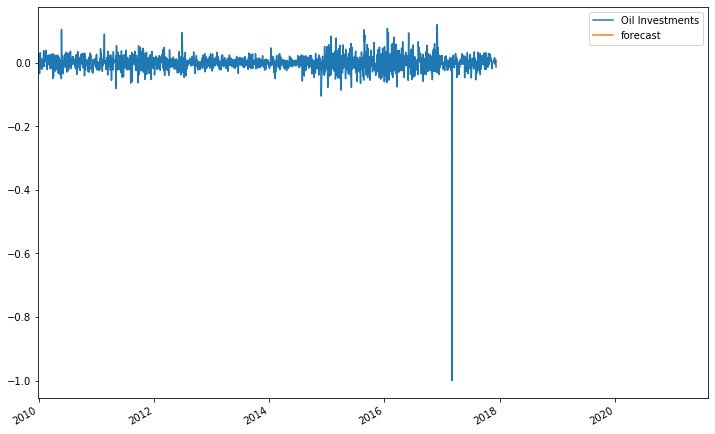

In [75]:
future_df['forecast'] = results.predict(start = 80, end = 2000, dynamic= True)  
future_df[['Oil Investments', 'forecast']].plot(figsize=(12, 8)) 